In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori as ap
from mlxtend.frequent_patterns import association_rules as ar
from wordcloud import WordCloud
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
dataset=pd.read_excel("/content/drive/MyDrive/groceries.xlsx",header=None)
groc_data = pd.DataFrame(dataset)
groc_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Apriori Algorithm

In [ ]:
encoding = []
        
for i in range(0, 9835):
    encoding.append([str(groc_data.values[i,j]) for j in range(0, 32)])
    
# Encodes database transaction data in form of a Python list of lists into a NumPy array
# conveting it into an numpy array
encoding = np.array(encoding)

In [ ]:
te = TransactionEncoder()

groc_data = te.fit(encoding).transform(encoding)
groc_data = pd.DataFrame(groc_data, columns = te.columns_)
groc_data=groc_data.drop(['nan'],axis=1).astype('int')
groc_data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_items=ap(groc_data, min_support = 0.001, use_colnames = True)
# frequent_items = frequent_items.drop([60,61],axis=0)
most_pop_items=frequent_items.sort_values('support',ascending=False)
# most_pop_items
most_pop_items=most_pop_items.head(15)
most_pop_items

,support,itemsets
154,0.255516,(whole milk)
96,0.193493,(other vegetables)
115,0.183935,(rolls/buns)
130,0.174377,(soda)
155,0.139502,(yogurt)
10,0.110524,(bottled water)
116,0.108998,(root vegetables)
147,0.104931,(tropical fruit)
125,0.098526,(shopping bags)
122,0.093950,(sausage)


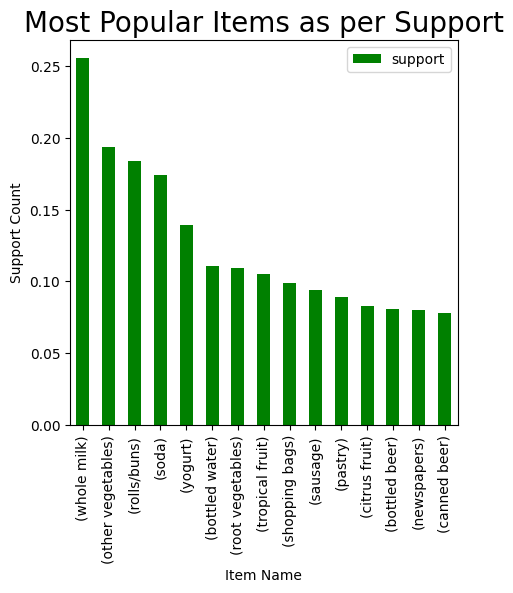

In [ ]:
plt.rcParams['figure.figsize']=(5,5)
most_pop_items.plot.bar('itemsets','support',color='Green')
plt.xlabel('Item Name',fontsize=10)
plt.ylabel('Support Count',fontsize=10)
plt.title('Most Popular Items as per Support',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

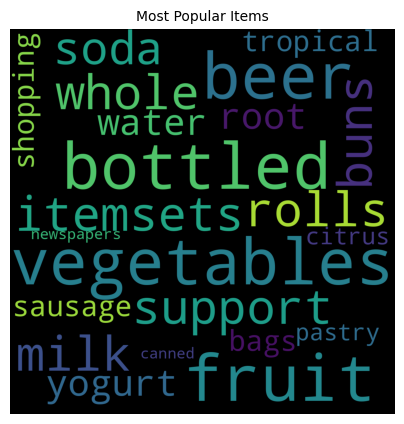

In [ ]:
plt.rcParams['figure.figsize']=(5,5)
wordcloud=WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(str(most_pop_items))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize=10)
plt.show()

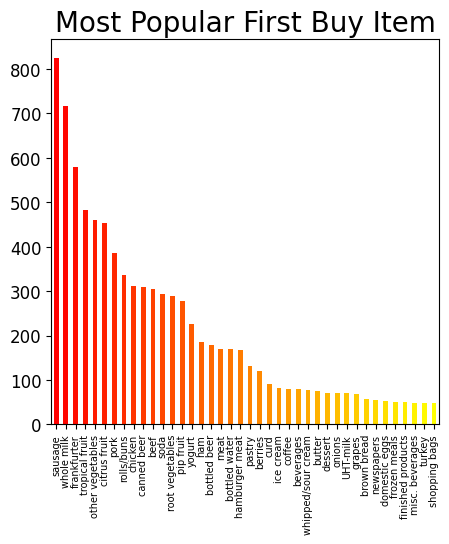

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)
color = plt.cm.autumn(np.linspace(0, 1, 40))
dataset[0].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular First Buy Item', fontsize = 20)
plt.xticks(rotation = 90,fontsize=7 )
plt.yticks(fontsize=12)
plt.show()

In [ ]:
association_confi=ar(frequent_items,metric='confidence',min_threshold=0.4)
a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
5054,"(sugar, cream cheese, domestic eggs)",(whole milk),0.001118,1.0,3.913649,0.000833,inf
8350,"(rolls/buns, whipped/sour cream, pastry, citru...",(whole milk),0.001017,1.0,3.913649,0.000757,inf
8724,"(tropical fruit, yogurt, pip fruit, ham)",(other vegetables),0.001017,1.0,5.168156,0.000820,inf
8035,"(other vegetables, whipped/sour cream, butter,...",(whole milk),0.001017,1.0,3.913649,0.000757,inf
5188,"(curd, sugar, domestic eggs)",(whole milk),0.001017,1.0,3.913649,0.000757,inf
4859,"(root vegetables, soft cheese, citrus fruit)",(other vegetables),0.001017,1.0,5.168156,0.000820,inf
3962,"(butter, hygiene articles, pip fruit)",(whole milk),0.001017,1.0,3.913649,0.000757,inf
855,"(canned fish, hygiene articles)",(whole milk),0.001118,1.0,3.913649,0.000833,inf
8707,"(grapes, whole milk, tropical fruit, yogurt)",(other vegetables),0.001017,1.0,5.168156,0.000820,inf
2687,"(rice, sugar)",(whole milk),0.001220,1.0,3.913649,0.000908,inf


In [ ]:
association_supp=ar(frequent_items,metric='support',min_threshold=0.05)
a_supp_top=association_supp.sort_values('support',ascending=False)
a_supp_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.056024,0.401603,1.571735,0.020379,1.244132


In [ ]:
association_lift=ar(frequent_items,metric='lift',min_threshold=3)
a_lift_top=association_lift.sort_values('lift',ascending=False)
a_lift_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
1531,(liquor),"(red/blush wine, bottled beer)",0.001932,0.174312,35.715787,0.001878,1.205200
1526,"(red/blush wine, bottled beer)",(liquor),0.001932,0.395833,35.715787,0.001878,1.636828
46956,"(whole milk, tropical fruit, oil)","(other vegetables, root vegetables, yogurt)",0.001017,0.400000,30.976378,0.000984,1.645145
46973,"(other vegetables, root vegetables, yogurt)","(whole milk, tropical fruit, oil)",0.001017,0.078740,30.976378,0.000984,1.082711
46959,"(other vegetables, whole milk, tropical fruit)","(root vegetables, yogurt, oil)",0.001017,0.059524,30.811404,0.000984,1.061237
46970,"(root vegetables, yogurt, oil)","(other vegetables, whole milk, tropical fruit)",0.001017,0.526316,30.811404,0.000984,2.075049
46697,"(other vegetables, whole milk, domestic eggs, ...","(butter, tropical fruit)",0.001017,0.303030,30.411255,0.000983,1.420486
46736,"(butter, tropical fruit)","(other vegetables, whole milk, domestic eggs, ...",0.001017,0.102041,30.411255,0.000983,1.109900
46711,"(whole milk, tropical fruit, butter)","(other vegetables, domestic eggs, yogurt)",0.001017,0.163934,28.285879,0.000981,1.189146
46722,"(other vegetables, domestic eggs, yogurt)","(whole milk, tropical fruit, butter)",0.001017,0.175439,28.285879,0.000981,1.205244


In [ ]:
file = pd.ExcelWriter('Desktop\confidence.xlsx')
a_confi_top.drop(['antecedent support','consequent support','leverage','conviction'],axis=1).head(30).to_excel(file)
# assocn_rules_conf['consequents'].to_excel(file)

file.save()

<ipython-input-13-9972cb15ed4f>:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  file.save()


#FP Growth Algorithm

In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlxtend

In [ ]:
import numpy as np 
import pandas as pd
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/groceries.xlsx' , header = None)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
# size of dataset 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There are 9835 rows and 32 columns


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,whole milk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,0,0,0,0,0,0,0,0,0,0
9831,cooking chocolate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,0,0,0,0,0,0,0,0,0,0
9833,semi-finished bread,bottled water,soda,bottled beer,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sample(10)
# Some random rows from dataset 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
7751,meat,other vegetables,whole milk,pastry,soda,newspapers,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6255,frankfurter,meat,pork,beef,berries,other vegetables,whole milk,domestic eggs,Instant food products,coffee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7405,canned beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5503,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9453,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
920,sausage,citrus fruit,whole milk,yogurt,rolls/buns,bottled water,soda,napkins,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2929,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7690,rolls/buns,dishes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5914,pork,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6254,ham,root vegetables,whole milk,butter,whipped/sour cream,hard cheese,rolls/buns,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
items = (df[0].unique())

for i in items:
    print(i)
    
#Finding unique items in column 1 (Mostly having all the unique items )

citrus fruit
tropical fruit
whole milk
pip fruit
other vegetables
rolls/buns
potted plants
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
butter milk
bottled water
yogurt
sausage
brown bread
hamburger meat
root vegetables
pork
pastry
canned beer
berries
coffee
misc. beverages
ham
turkey
curd cheese
red/blush wine
frozen potato products
flour
sugar
frozen meals
herbs
soda
detergent
grapes
processed cheese
fish
sparkling wine
newspapers
curd
pasta
popcorn
finished products
beverages
bottled beer
dessert
dog food
specialty chocolate
condensed milk
cleaner
white wine
meat
ice cream
hard cheese
cream cheese
liquor
pickled vegetables
liquor (appetizer)
UHT-milk
candy
onions
hair spray
photo/film
domestic eggs
margarine
shopping bags
salt
oil
whipped/sour cream
frozen vegetables
sliced cheese
dish cleaner
baking powder
specialty cheese
salty snack
Instant food products
pet care
white bread
female sanitary products
cling film/bags
soap
f

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
encod_df = pd.DataFrame(encoded_vals)

#Encoding values 

encod_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,brown bread,hair spray,sausage,grapes,butter milk,pip fruit,salty snack,syrup,root vegetables,frozen chicken,...,prosecco,packaged fruit/vegetables,long life bakery product,spread cheese,rum,onions,cream cheese,margarine,citrus fruit,semi-finished bread
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,shopping bags,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [ ]:
# from mlxtend.frequent_patterns import fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
freq_items = fpgrowth(encod_df , min_support = 0.005 , use_colnames = True)
freq_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
...,...,...
995,0.005491,"(meat, soda)"
996,0.005084,"(root vegetables, meat)"
997,0.005287,"(meat, sausage)"
998,0.005287,"(meat, yogurt)"


In [ ]:
most_popular_items=freq_items.sort_values('support',ascending=False)
most_popular_items = most_popular_items.head(15)
most_popular_items
#Top 15 most frequent items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
6,0.255516,(whole milk)
9,0.193493,(other vegetables)
13,0.183935,(rolls/buns)
26,0.174377,(soda)
3,0.139502,(yogurt)
19,0.110524,(bottled water)
38,0.108998,(root vegetables)
4,0.104931,(tropical fruit)
46,0.098526,(shopping bags)
45,0.093950,(sausage)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


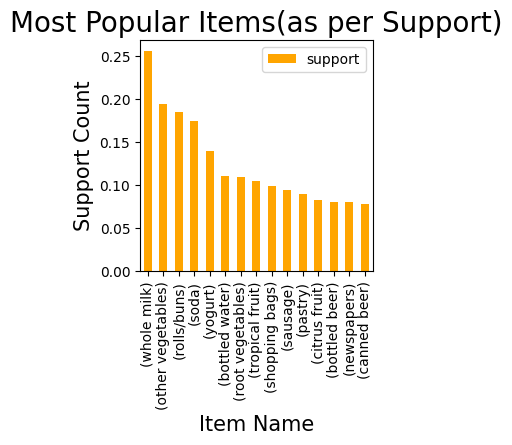

In [ ]:
most_popular_items.values.tolist()

plt.rcParams['figure.figsize']=(3,3)
most_popular_items.plot.bar('itemsets','support',color='Orange')
plt.xlabel('Item Name',fontsize=15)
plt.ylabel('Support Count',fontsize=15)
plt.title('Most Popular Items(as per Support)',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.05)
rules.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577
1,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
2,(yogurt),(citrus fruit),0.139502,0.082766,0.021657,0.155248,1.875752,0.010111,1.085803
3,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467
4,(tropical fruit),(citrus fruit),0.104931,0.082766,0.019929,0.189922,2.294702,0.011244,1.132280
...,...,...,...,...,...,...,...,...,...
95,"(other vegetables, rolls/buns)",(citrus fruit),0.042603,0.082766,0.005999,0.140811,1.701328,0.002473,1.067559
96,"(other vegetables, citrus fruit)",(rolls/buns),0.028876,0.183935,0.005999,0.207746,1.129456,0.000688,1.030055
97,"(rolls/buns, citrus fruit)",(other vegetables),0.016777,0.193493,0.005999,0.357576,1.848007,0.002753,1.255412
98,(citrus fruit),"(other vegetables, rolls/buns)",0.082766,0.042603,0.005999,0.072482,1.701328,0.002473,1.032214


In [ ]:
association_confi=association_rules(freq_items,metric='confidence',min_threshold=0.05)
a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,leverage,conviction
342,"(root vegetables, tropical fruit, yogurt)",(whole milk),0.005694,0.700000,2.739554,0.003616,2.481613
528,"(root vegetables, pip fruit, other vegetables)",(whole milk),0.005491,0.675000,2.641713,0.003412,2.290720
712,"(whipped/sour cream, butter)",(whole milk),0.006711,0.660000,2.583008,0.004113,2.189659
2055,"(whipped/sour cream, pip fruit)",(whole milk),0.005999,0.648352,2.537421,0.003635,2.117126
657,"(butter, yogurt)",(whole milk),0.009354,0.638889,2.500387,0.005613,2.061648
702,"(root vegetables, butter)",(whole milk),0.008236,0.637795,2.496107,0.004936,2.055423
951,"(curd, tropical fruit)",(whole milk),0.006507,0.633663,2.479936,0.003883,2.032240
80,"(root vegetables, whole milk, citrus fruit)",(other vegetables),0.005796,0.633333,3.273165,0.004025,2.199566
453,"(other vegetables, pip fruit, yogurt)",(whole milk),0.005084,0.625000,2.446031,0.003005,1.985291
2261,"(pip fruit, domestic eggs)",(whole milk),0.005389,0.623529,2.440275,0.003181,1.977536


In [ ]:
!pip install matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


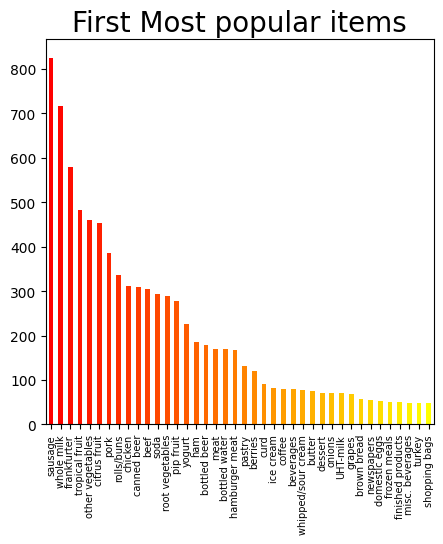

In [ ]:
plt.rcParams['figure.figsize'] = (5,5)
color = plt.cm.autumn(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)
plt.title('First Most popular items', fontsize = 20)
plt.xticks(rotation = 90 , fontsize = 7)
plt.yticks(fontsize = 10)
#plt.grid()

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


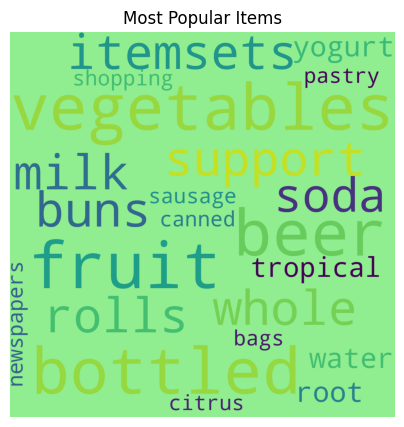

In [ ]:
plt.rcParams['figure.figsize']=(5,5)
wordcloud=WordCloud(background_color = 'lightgreen', width = 1500, height = 1500, max_words = 121).generate(str(most_popular_items))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 12)
plt.show()

In [ ]:
file = pd.ExcelWriter('Desktop\Rules.xlsx')
a_confi_top.drop(['antecedent support','consequent support','leverage','conviction'],axis=1).head(100).to_excel(file)
# assocn_rules_conf['consequents'].to_excel(file)

file.save()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\R'
<>:1: DeprecationWarning: invalid escape sequence '\R'
<ipython-input-42-7ce268ea1ef7>:1: DeprecationWarning: invalid escape sequence '\R'
  file = pd.ExcelWriter('Desktop\Rules.xlsx')
<ipython-input-42-7ce268ea1ef7>:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  file.save()


In [ ]:
association_supp=association_rules(freq_items,metric='support',min_threshold=0.05)
a_supp_top=association_supp.sort_values('support',ascending=False)
a_supp_top.drop(['antecedent support','consequent support'],axis=1).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,leverage,conviction
2,(other vegetables),(whole milk),0.074835,0.386758,1.513634,0.025394,1.214013
3,(whole milk),(other vegetables),0.074835,0.292877,1.513634,0.025394,1.140548
4,(whole milk),(rolls/buns),0.056634,0.221647,1.205032,0.009636,1.048452
5,(rolls/buns),(whole milk),0.056634,0.307905,1.205032,0.009636,1.075696
0,(whole milk),(yogurt),0.056024,0.219260,1.571735,0.020379,1.102157


In [ ]:
association_lift=association_rules(freq_items,metric='lift',min_threshold=3)
a_lift_top=association_lift.sort_values('lift',ascending=False)
a_lift_top.drop(['antecedent support','consequent support'],axis=1).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,leverage,conviction
56,"(whole milk, tropical fruit)","(root vegetables, yogurt)",0.005694,0.134615,5.212371,0.004602,1.125712
55,"(root vegetables, yogurt)","(whole milk, tropical fruit)",0.005694,0.220472,5.212371,0.004602,1.228567
54,"(root vegetables, tropical fruit)","(whole milk, yogurt)",0.005694,0.270531,4.828814,0.004515,1.294059
57,"(whole milk, yogurt)","(root vegetables, tropical fruit)",0.005694,0.101633,4.828814,0.004515,1.089703
93,"(other vegetables, whole milk)","(root vegetables, pip fruit)",0.005491,0.073370,4.716272,0.004326,1.062390
90,"(root vegetables, pip fruit)","(other vegetables, whole milk)",0.005491,0.352941,4.716272,0.004326,1.429801
205,(ham),(white bread),0.005084,0.195312,4.639851,0.003988,1.190407
204,(white bread),(ham),0.005084,0.120773,4.639851,0.003988,1.107758
43,"(root vegetables, tropical fruit)","(other vegetables, whole milk)",0.007016,0.333333,4.454257,0.005441,1.387748
46,"(other vegetables, whole milk)","(root vegetables, tropical fruit)",0.007016,0.093750,4.454257,0.005441,1.080224


# Conclusion/Findings:

The result of this market basket analysis could be used for a data-driven marketing strategy and decision making.
Both apriori and FP growth algorithms retrieved the similar results with no huge differences.
 In this datasets, we could generate several business insights as follows 

# Item Placements:

We could put (tropical fruit, whole milk) and (yogurt) in a closer place, maybe in a same shelf or any other closer place for easy findings of frequently bought items together.

# Products Bundling:

We could put (tropical fruit, whole milk) and (yogurt) as a single bundle of product with a lower price compare to each price combined. This way will attract more sales and generates more income.

#Product Recommendations:

We can even suggest product recommendations to the customers. Like if a customer is purchasing a product then we can suggest him to buy recommended products.